<a href="https://colab.research.google.com/github/kedarkotwal1/FraudJobDetection/blob/Final-Versions/Final_FakeJobPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
import pandas as pd
import nltk
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/MSC_Project 

/content/drive/MyDrive/MSC_Project


In [ ]:
mydf = pd.read_csv('fake_job.csv')

In [ ]:
print(mydf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
mydf.shape

(17880, 18)

In [ ]:
print(mydf.info())
print(mydf.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
mydf['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

Creating a copy of mydf and storing it into jobdf

In [ ]:
jobdf = mydf.copy()

In [ ]:
print(jobdf.head(2))

   job_id                                      title          location  \
0       1                           Marketing Intern  US, NY, New York   
1       2  Customer Service - Cloud Video Production    NZ, , Auckland   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsibilit...   

                                            benefits  telecommuting  \
0                                                NaN              0   
1  What you will get from usThrough being part of...    

Total Null values in the dataset

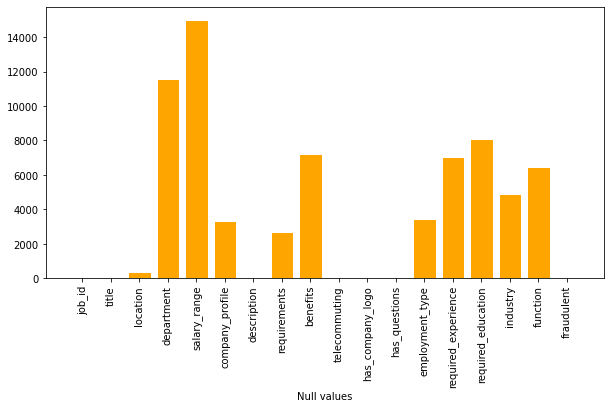

In [ ]:
nullval = jobdf.isnull().sum()
plt.figure(figsize=(10,5))
plt.bar(jobdf.columns,nullval,color = 'orange', edgecolor = 'white')
plt.xlabel('Null values')
plt.xticks(rotation='vertical')
plt.show()

#Feature Engineering

Finding word length count of company_profile, job description, requirements, benefits.

In [ ]:
#print(mydf['required_education'].unique())
function = lambda x:len(x.split(' '))

len_compprof = jobdf['company_profile'].astype(str).apply(function)
len_desc = jobdf['description'].astype(str).apply(function)
len_req = jobdf['requirements'].astype(str).apply(function)
len_benefits = jobdf['benefits'].astype(str).apply(function)


#Creating Columns
jobdf['compprof_len'] = len_compprof
jobdf['desc_len'] = len_desc
jobdf['req_len'] = len_req
jobdf['benefits_len'] = len_benefits


Display description of the job advert with maximum description word count

In [ ]:
print("job advert with maximum word count", jobdf['desc_len'].max())
#jobdf['desc_len'].loc[:,201]

job advert with maximum word count 2074


Replacing benefits NaN values by 'empty'

In [ ]:
jobdf['company_profile'].fillna('Empty',inplace=True)
jobdf['requirements'].fillna('Empty',inplace=True)
jobdf['description'].fillna('Empty',inplace=True)
jobdf['benefits'].fillna('Empty',inplace=True)

In [ ]:
print(jobdf.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

In [ ]:
jobdf.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,NaN,NaN,Marketing,0,141,124,115,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,150,309,187,225
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,NaN,NaN,NaN,NaN,NaN,0,136,50,164,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,85,345,174,96
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,205,182,89,3


Creating new column empty_benefits, empty_desc, empty_compprof having value as 1 otherwise 0 if respective columns have some content present.

In [ ]:
checkNA = lambda x: 1 if x=='Empty' else 0

empty_compprof = pd.DataFrame(jobdf['company_profile'].astype(str).apply(checkNA))
empty_desc = pd.DataFrame(jobdf['description'].astype(str).apply(checkNA))
empty_req = pd.DataFrame(jobdf['requirements'].astype(str).apply(checkNA))
empty_benefits = pd.DataFrame(jobdf['benefits'].astype(str).apply(checkNA))


actually creating columns.

In [ ]:
jobdf['empty_compprof'] = empty_compprof
jobdf['empty_desc'] = empty_desc
jobdf['empty_req'] = empty_req
jobdf['empty_benefits'] = empty_benefits

In [ ]:
jobdf.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,NaN,NaN,Marketing,0,141,124,115,1,0,0,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,150,309,187,225,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,NaN,NaN,NaN,NaN,NaN,0,136,50,164,1,0,0,0,1
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,85,345,174,96,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,205,182,89,3,0,0,0,0


Plotting the length of fraud and non_fraud job adverts.

This will be used for setting thresholds for less number of word count

Description length

In [ ]:
desc_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].desc_len)
desc_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].desc_len)

print(type(desc_nonfraud))

desc_fraud.reset_index(drop=True,inplace=True)
desc_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


<Figure size 2880x720 with 0 Axes>

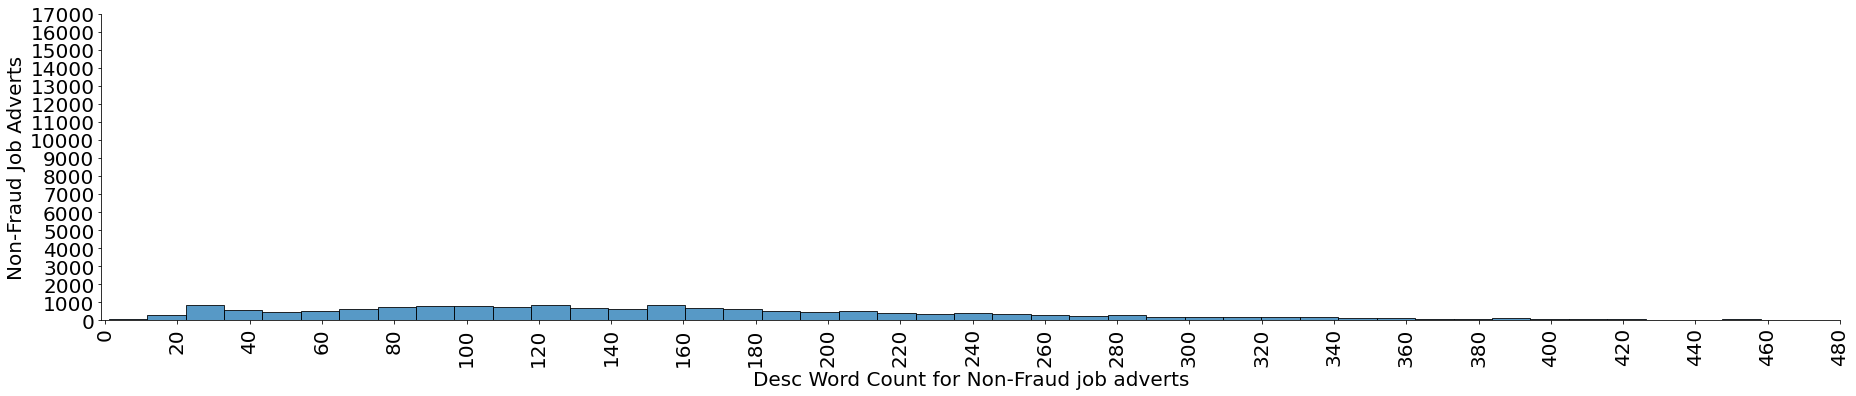

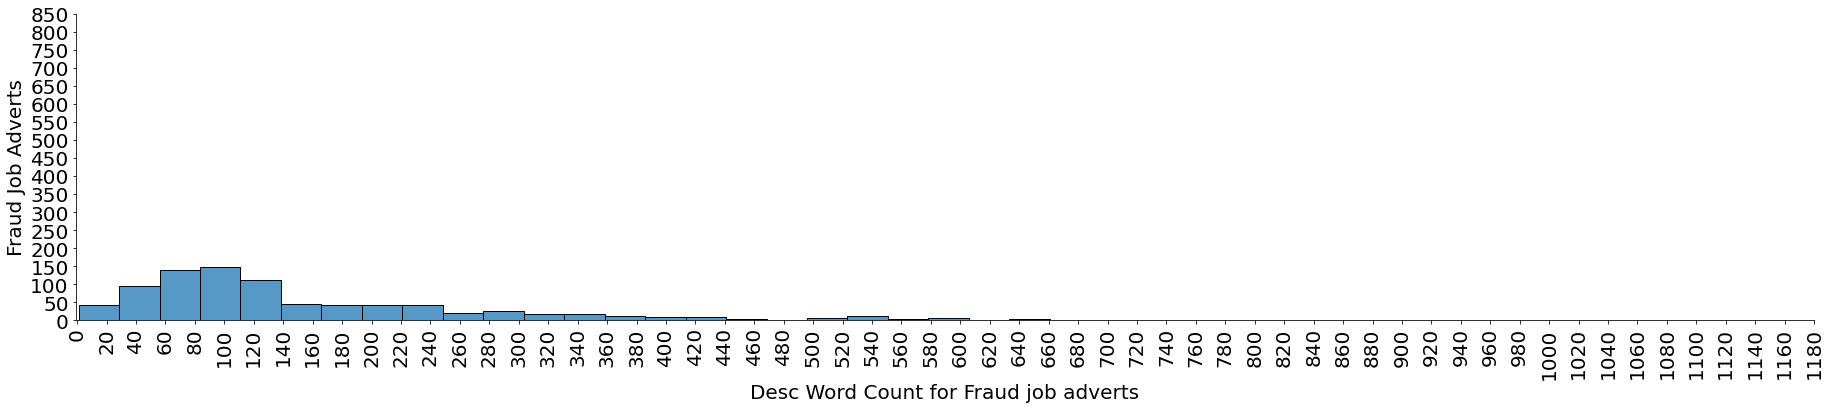

In [ ]:
plt.figure(figsize=(40,10))
sns.displot(desc_nonfraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500, 20), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_nonfraud['desc_len'])), 1000), fontsize = 20)
#plt.show()

sns.displot(desc_fraud['desc_len'], height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Desc Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,max(list(desc_fraud['desc_len'])), 20), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(desc_fraud['desc_len'])), 50), fontsize = 20)
plt.show()

***THRESHOLD FOR SHORT LENGTH***

We want to set the threshold based on the word count for fraud job adverts as ultimately we are going to classify fraud job adverts. 

So, a word count length below which there are large number of fraud jobs and less number of genuine job adverts. 


By viewing distribution of lengths for fraud and non fraud... it should be checked whether there is a certain threshold of the word count length that covers most of fraud job adverts, if there is, check whether the same threshold has any influence on non fraud adverts. 



Considering 100 as threshold for short description. There are 393 out of 866 fraud job adverts with less than 100 desc_len (49% fraud jobs) and 5k out of 17k(29% genuine job adverts) with less than 100 desc_len

In [ ]:
len(jobdf[(jobdf['desc_len']<=100) & (jobdf['fraudulent']==0)])

5284

In [ ]:
#has short description
def has_short_description(x):
  if x <= 100:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_desc_list = jobdf['desc_len'].apply(has_short_description)

In [ ]:
jobdf['has_short_desc'] = short_desc_list
print(short_desc_list[0:5], "\n", jobdf.desc_len.head(5))



0    0
1    0
2    1
3    0
4    0
Name: desc_len, dtype: int64 
 0    124
1    309
2     50
3    345
4    182
Name: desc_len, dtype: int64


trial

In [ ]:
jobdf.shape

(17880, 27)

Benefits length

In [ ]:
benefits_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].benefits_len)
benefits_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].benefits_len)

print(type(benefits_nonfraud))

benefits_fraud.reset_index(drop=True,inplace=True)
benefits_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


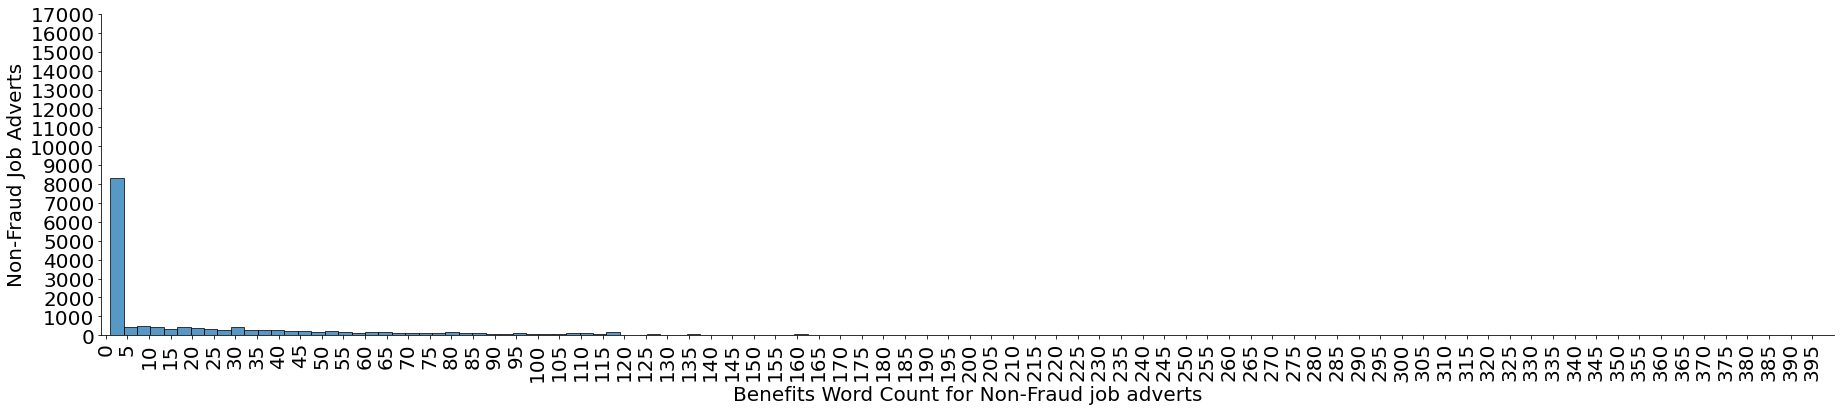

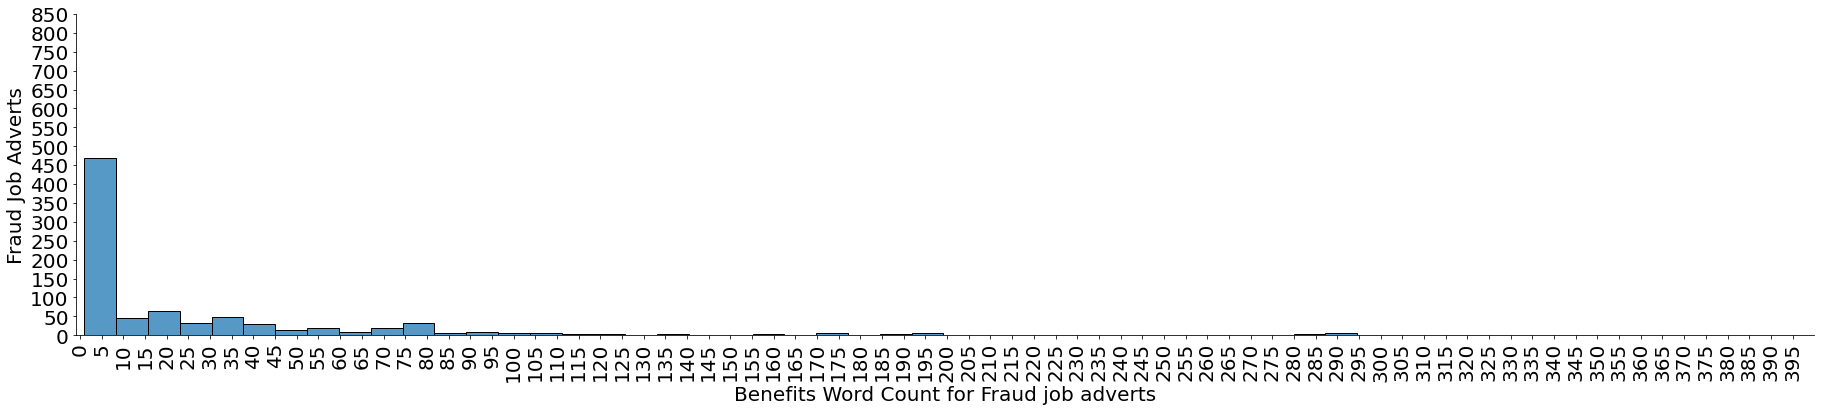

In [ ]:
sns.displot(list(benefits_nonfraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_nonfraud['benefits_len'])),1000), fontsize = 20)
plt.show()

sns.displot(list(benefits_fraud['benefits_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Benefits Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,400,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(benefits_fraud['benefits_len'])),50), fontsize = 20)
plt.show()

When considering 8 as threshold for short benefits. There are 469 out of 866 fraud job adverts with less than 100 benefits_len (54% fraud jobs) and 8k out of 17k(52% genuine job adverts) with less than 8 word count of benefits_len.

This insight is not useful to set a threshold for short benefits word count as both of the classes have almost equal percentages.

In [ ]:
len(jobdf[(jobdf['benefits_len']<=8) & (jobdf['fraudulent']==0)])

8923

company profile length

In [ ]:
compprof_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].compprof_len)
compprof_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].compprof_len)

print(type(compprof_nonfraud))

compprof_fraud.reset_index(drop=True,inplace=True)
compprof_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


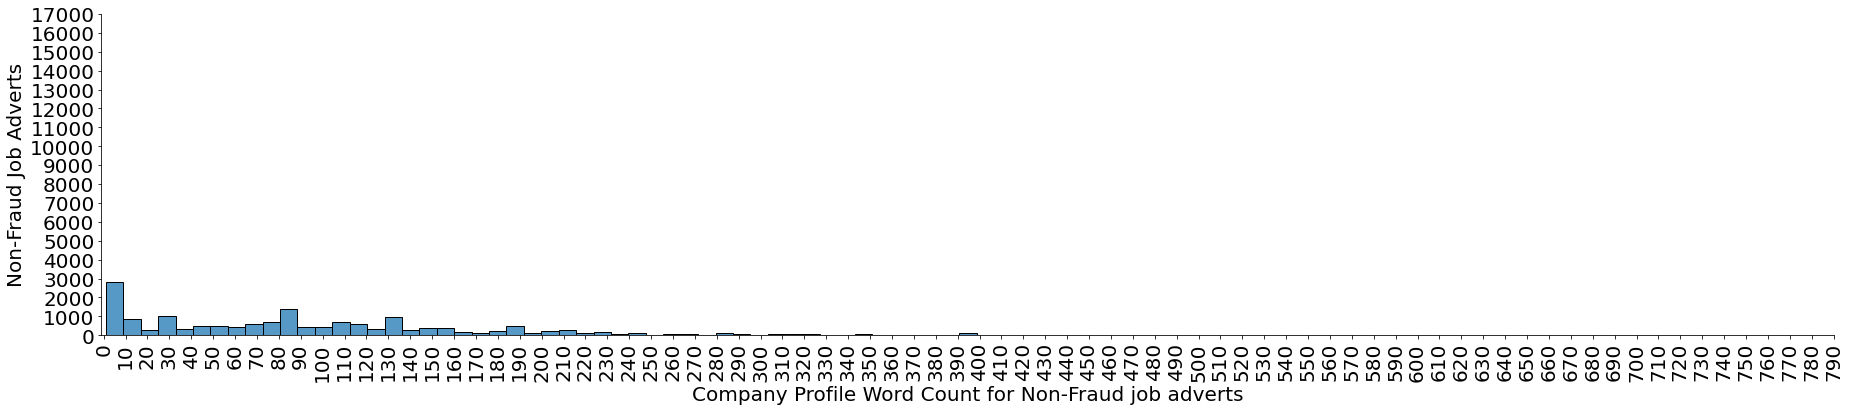

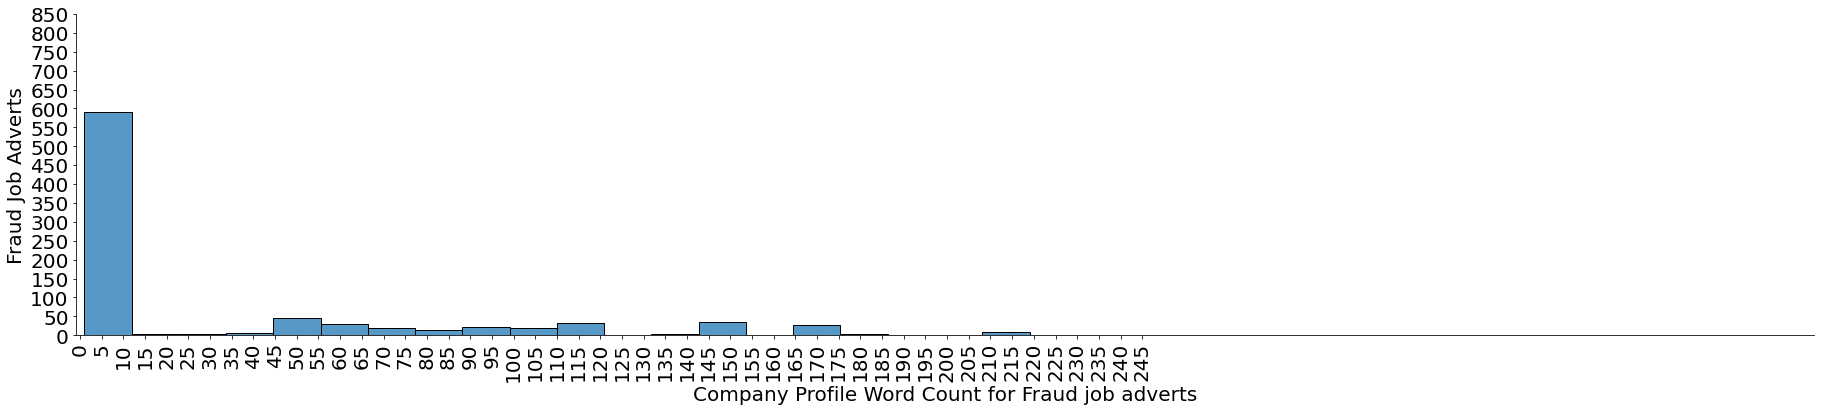

In [ ]:
sns.displot(list(compprof_nonfraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,800,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_nonfraud['compprof_len'])),1000), fontsize = 20)
plt.show()

sns.displot(list(compprof_fraud['compprof_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Company Profile Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,250,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(compprof_fraud['compprof_len'])),50), fontsize = 20)
plt.show()

Considering 10 as threshold for company profile word count, as fraud jobs have total 587 out of 866 fraud job adverts (68%) and genuine jobs have 3544 adverts out of 17014 (20%) below 10 word count length.

In [ ]:
len(jobdf[(jobdf['compprof_len']<=10) & (jobdf['fraudulent']==1)])

590

In [ ]:
#has short company profile
def has_short_compprof(x):
  if x <= 10:
    return 1
  else:
    return 0

#has_short_desc = lambda x: 1 if x<=100 else 0

short_compprof_list = jobdf['compprof_len'].apply(has_short_compprof)

In [ ]:
jobdf['has_short_compprof'] = short_compprof_list
print(short_compprof_list[0:5], "\n", jobdf.compprof_len.head(5))

0    0
1    0
2    0
3    0
4    0
Name: compprof_len, dtype: int64 
 0    141
1    150
2    136
3     85
4    205
Name: compprof_len, dtype: int64


Requirments length

In [ ]:
req_len_fraud = pd.DataFrame(jobdf[jobdf['fraudulent']==1].req_len)
req_len_nonfraud = pd.DataFrame(jobdf[jobdf['fraudulent']==0].req_len)

print(type(req_len_fraud))

req_len_fraud.reset_index(drop=True,inplace=True)
req_len_nonfraud.reset_index(drop=True,inplace=True)

<class 'pandas.core.frame.DataFrame'>


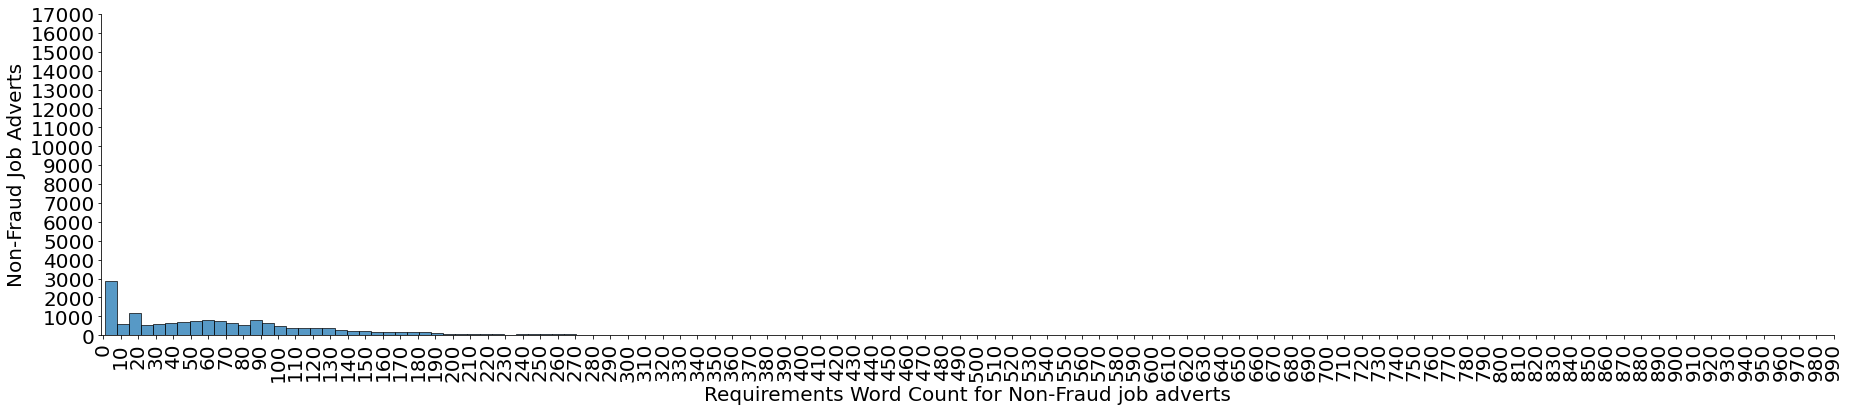

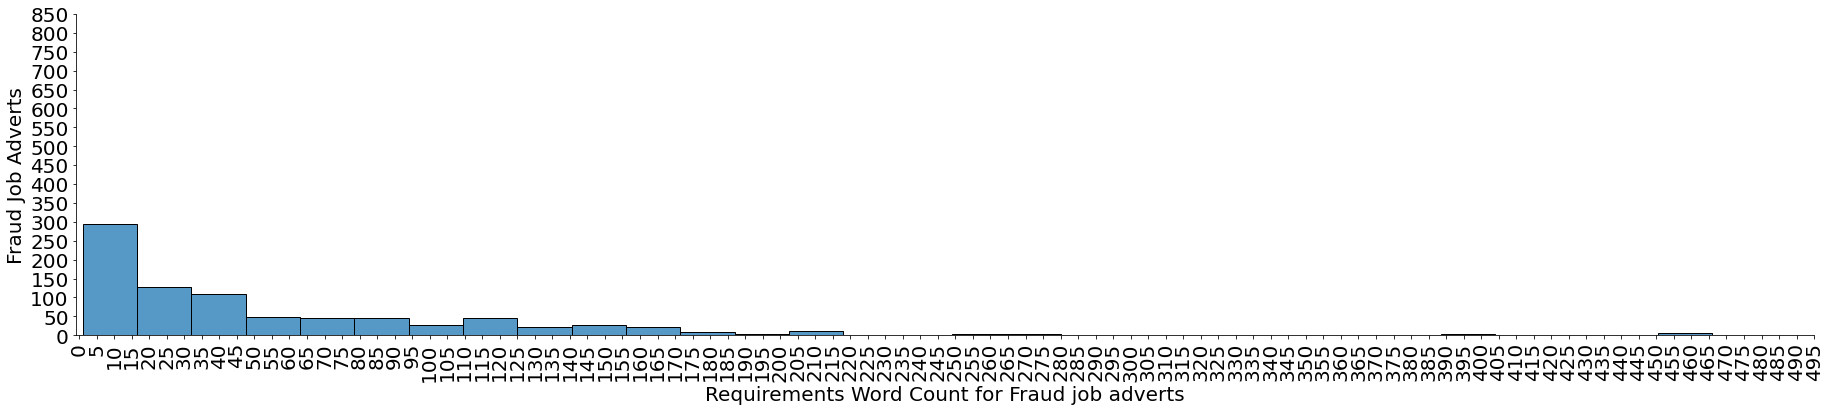

In [ ]:
sns.displot(list(req_len_nonfraud['req_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Non-Fraud job adverts', fontsize = 20)
plt.ylabel('Non-Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,1000,10), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_nonfraud['req_len'])),1000), fontsize = 20)
plt.show()

sns.displot(list(req_len_fraud['req_len']), height = 5, aspect = 5)
plt.xlim([-1,400])
plt.xlabel('Requirements Word Count for Fraud job adverts', fontsize = 20)
plt.ylabel('Fraud Job Adverts', fontsize = 20)
plt.xticks(range(0,500,5), rotation='vertical', fontsize = 20)
plt.yticks(range(0,len(list(req_len_fraud['req_len'])), 50), fontsize = 20)
plt.show()

16 as threshold for requirements word count, as fraud jobs have total 294 out of 866 fraud job adverts (33%) and genuine jobs have 3576 adverts out of 17014 (21%) below 60 word count length.

This insight is not useful enough to set a threshold for short_requirements

In [ ]:
len(jobdf[(jobdf['req_len']<=16) & (jobdf['fraudulent']==1)])

294

In [ ]:
len(jobdf[jobdf['fraudulent']==0])

17014

Average of Length of Textual columns for Fraud and NonFraud job adverts

In [ ]:
from numpy.lib.function_base import average
print(average(compprof_fraud))
print(average(compprof_nonfraud))

print(average(desc_fraud))
print(average(desc_nonfraud))

print(average(benefits_fraud))
print(average(benefits_nonfraud))



32.953810623556585
94.94157752439168
157.81524249422634
171.0435523686376
30.648960739030024
30.400846361819678


Replacing NaN values of columns having boolean values to Empty

In [ ]:
jobdf['employment_type'].fillna('Empty',inplace=True)
jobdf['required_experience'].fillna('Empty',inplace=True)
jobdf['required_education'].fillna('Empty',inplace=True)
jobdf['industry'].fillna('Empty',inplace=True)
jobdf['function'].fillna('Empty',inplace=True)
jobdf['department'].fillna('Empty',inplace=True)


In [ ]:
jobdf.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,Empty,Empty,Marketing,0,141,124,115,1,0,0,0,1,0,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,150,309,187,225,0,0,0,0,0,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Empty,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,136,50,164,1,0,0,0,1,1,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,85,345,174,96,0,0,0,0,0,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Empty,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,205,182,89,3,0,0,0,0,0,0


Creating new feature has_special_attributes

In [ ]:
special_attr_list = []

for i in range(len(jobdf['required_education'])):
  a = jobdf['required_education'][i]
  b = jobdf['required_experience'][i]
  c = jobdf['function'][i]
  d = jobdf['department'][i]

  if a == 'Empty' and b == 'Empty' and c == 'Empty' and d == 'Empty':
    special_attr_list.append(0)
  else:
    special_attr_list.append(1)
  


In [ ]:
jobdf['has_spec_attr'] = special_attr_list

In [ ]:
jobdf.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,compprof_len,desc_len,req_len,benefits_len,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_spec_attr
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,Empty,Empty,Marketing,0,141,124,115,1,0,0,0,1,0,0,1
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,150,309,187,225,0,0,0,0,0,0,1
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Empty,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,136,50,164,1,0,0,0,1,1,0,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,85,345,174,96,0,0,0,0,0,0,1
4,5,Bill Review Manager,"US, FL, Fort Worth",Empty,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,205,182,89,3,0,0,0,0,0,0,1


#**Machine Learning Models Implementation**

In [ ]:
detectdf = jobdf.copy()

In [ ]:
detectdf.drop(['title','location','salary_range','company_profile','description','requirements','benefits','compprof_len','desc_len','benefits_len','req_len'],axis=1,inplace=True)

In [ ]:
detectdf.drop(['job_id'],axis=1,inplace=True)

In [ ]:
detectdf = detectdf[['department','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','empty_compprof','empty_desc','empty_req','empty_benefits','has_short_desc','has_short_compprof', 'has_spec_attr','fraudulent']]

In [ ]:
#detectdf = detectdf[['department','telecommuting','has_company_logo','has_questions','employment_type','required_experience','required_education','industry','function','empty_compprof','empty_desc','empty_req','empty_benefits','has_short_desc','has_short_benefits','has_short_req','has_short_compprof','fraudulent']]

In [ ]:
detectdf.head()

,department,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_spec_attr,fraudulent
0,Marketing,0,1,0,Other,Internship,Empty,Empty,Marketing,0,0,0,1,0,0,1,0
1,Success,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0,0,0,0,0,0,1,0
2,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0,0,0,1,1,0,0,0
3,Sales,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,0,0,0,0,0,1,0
4,Empty,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,0,0,0,0,0,1,0


Distribution of Fraud and Non-fraud job adverts, very unbalanced dataset.

In [ ]:
jobdf['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

One Hot Encoding

In [ ]:
detectdf = pd.get_dummies(detectdf, columns = ['department', 'employment_type','required_education','required_experience','industry','function'])


In [ ]:
detectdf.head()

,telecommuting,has_company_logo,has_questions,empty_compprof,empty_desc,empty_req,empty_benefits,has_short_desc,has_short_compprof,has_spec_attr,fraudulent,department_,department_ \tCorporate Shared Services,department_ Lower Level Management,department_ Marketing,department_ Moni Technologies,department_ R&D,department_(Consultant),department_.NET,department_.net Development,department_0,department_1221,department_130 - Nutritional Yeast Packaging,department_1411,department_20,department_20131101,department_30517,department_3D Art,department_4,department_49,department_5,"department_6 locations in the United States, 3 in Canada and 1 in UK",department_640 Labs,department_@ ecgstudio | process improvement specialists,department_A Techstars Company,department_ACCOUNTING,department_ACCT,department_ACES,department_ACT,department_ADMIN,department_ADS,department_AFS12,department_AFS13,department_AFS14,department_AFS16,department_AFS18,department_AFSAU,department_AFSCC,department_AFSDT,department_AFSDTV,department_AFSHAR,department_AFSHO,department_AFSHON,department_AFSHOT,department_AFSMCA,department_AFSSA,department_AGENCY CONFIDENTIAL,department_ALM Practice,department_AMG,department_AMHS,department_AML,department_ANDROIDPIT,department_APP MEDIA,department_AR,department_AX 20140308/09 (2),department_Aberdeen,department_Academic,department_Account,department_Account Handling,department_Account Management,department_Account team,department_Account/finance,department_Accountant,department_Accounting,department_Accounting & Finance,department_Accounting / Finance,department_Accounting and Finance,department_Accounting/Finance,department_Accounting/Payroll,department_Accounts,department_Acquisitions and Divesments,department_Ad Sales,department_AdOps,department_AdYapper,department_Addy,department_Admin,department_Admin - Clerical,department_Admin/Clerical,department_Administration,department_Administration,department_Administration support,department_Administrative,department_Administrative,department_Administrative Dept,department_Administrative Office,department_Administrator,department_Advertising,department_Advisory,department_Advisory Department,department_Aerospace and Defense Engineering Services,department_Affiliate Marketing,department_Africa Program,department_African Program,department_Agency Systems,department_Agriculture,department_Aker Solutions Inc.,department_All,department_All Companies,department_An Impact Engine Company,department_Analyst,department_Analytics,department_Analytics & UX,department_Ancillery Revenue,department_Android,department_Android,department_Android Developer,department_Animal Control,department_Animation,department_Anti-Virus Software,department_App,department_App Delivery,department_App Dev,department_App Development,department_Appear Here,department_Application Development,department_Approvals Department,department_Apps,department_Aptris,department_Arc Int.,department_Architect,department_Argo Platinum,department_Art,department_Art Fairs,department_Art Studio,department_Art and Design,department_Asset Management,department_Assistant,department_Athletics,department_Audiology,department_Auto Sales,department_Automotive,department_Automotive and Parts Mfg,department_B2B,department_BCFB,department_BD,department_BDC,department_BDVPS,department_BI,department_BI Department – Applications Directorate,department_BIOMEDICAL EQUIPMENT TECHNICAN,department_BIPIO,department_BORN SOCIAL,department_Back Office,department_Back-End Development,department_Backend,department_Backend Developer,department_Bandsintown Amplified Textlinks,department_Banking,department_Berlin,department_Big Data,department_BigTime Software,department_Billing,department_Bindery,department_Biotech,department_Birdback,department_Biz Dev,department_BizDev/Product,department_Blippbuilder,department_Board of Directors,department_Branch Services,department_Brand,department_Brand and Marketing,department_Brandid,department_Broadcasting,depart

**Importing necessary libraries.**

And Undersampling...

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, accuracy_score
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.svm import SVC  


In [ ]:
jdf = detectdf.drop(['fraudulent'],axis=1)
y = detectdf['fraudulent']

In [ ]:
print(jdf.shape)
print(y.shape)

(17880, 1546)
(17880,)


Random Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
rus  = RandomUnderSampler(random_state=42)
jdf,y = rus.fit_resample(jdf, y)

jdf = pd.DataFrame(jdf)
y = pd.DataFrame(y)

In [ ]:
print(jdf.shape)
print(y.shape)

(1732, 1546)
(1732, 1)


In [ ]:
print(y[y['fraudulent']==0].shape)

(866, 1)


Splitting the data train test

In [ ]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(jdf, y,test_size = 0.2, random_state = 42)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (1385, 1546)
Testing split input-  (347, 1546)


In [ ]:
print(X_train.shape)
print(y_train.shape)

(1385, 1546)
(1385, 1)


Logistic Regression

In [ ]:
log_model = LogisticRegression(solver='lbfgs', max_iter=400).fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
predicted_logreg = log_model.predict(X_test)
p = pd.DataFrame(predicted_logreg)
actual = y_test

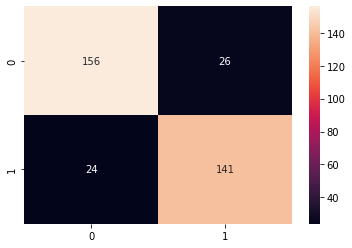

In [ ]:
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [ ]:
print("Classification report - \n", classification_report(y_test,predicted_logreg))

Classification report - 
               precision    recall  f1-score   support

           0       0.87      0.86      0.86       182
           1       0.84      0.85      0.85       165

    accuracy                           0.86       347
   macro avg       0.86      0.86      0.86       347
weighted avg       0.86      0.86      0.86       347



In [ ]:
logreg_acc = sm.accuracy_score(y_test, predicted_logreg)*100
logreg_prec = sm.precision_score(y_test, predicted_logreg)*100
logreg_recall = sm.recall_score(y_test, predicted_logreg)*100

In [ ]:
logreg_acc

85.5907780979827

DECISION TREE

In [ ]:
dtree=DecisionTreeClassifier()
p = dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [ ]:
y_pred_dtree = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred_dtree))

Classification report - 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       182
           1       0.88      0.91      0.90       165

    accuracy                           0.90       347
   macro avg       0.90      0.90      0.90       347
weighted avg       0.90      0.90      0.90       347



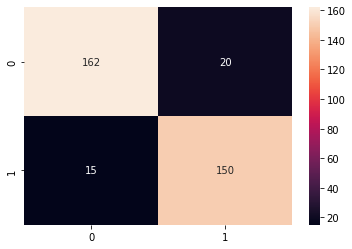

In [ ]:
pred = pd.DataFrame(y_pred_dtree)
cf_matrix = sm.confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [ ]:
dtree_acc = sm.accuracy_score(y_test, y_pred_dtree)*100
dtree_prec = sm.precision_score(y_test, y_pred_dtree)*100
dtree_recall = sm.recall_score(y_test, y_pred_dtree)*100

RANDOM FOREST

In [ ]:
clf = RandomForestClassifier(n_estimators = 100) 
clf.fit(X_train, y_train)
 
y_pred_rf = clf.predict(X_test)

print("ACCURACY OF THE MODEL: ", sm.accuracy_score(y_test, y_pred_rf))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


ACCURACY OF THE MODEL:  0.9365994236311239


In [ ]:
print("Classification report - \n", classification_report(y_test,y_pred_rf))

Classification report - 
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       182
           1       0.93      0.93      0.93       165

    accuracy                           0.94       347
   macro avg       0.94      0.94      0.94       347
weighted avg       0.94      0.94      0.94       347



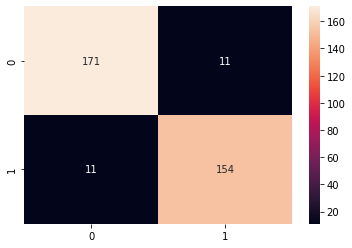

In [ ]:
p = pd.DataFrame(y_pred_rf)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')



In [ ]:
y_pred_rf.shape

(347,)

In [ ]:
rf_acc = sm.accuracy_score(y_test, y_pred_rf)*100
rf_prec = sm.precision_score(y_test, y_pred_rf)*100
rf_recall = sm.recall_score(y_test, y_pred_rf)*100


SVM

In [ ]:
clf = SVC(kernel='rbf',C=1, gamma=10) 

clf.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1, gamma=10)

In [ ]:
pred_svm = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_svm)

0.8011527377521613

In [ ]:
print("Classification report - \n", classification_report(actual,pred_svm))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.99      0.84       182
           1       0.99      0.59      0.74       165

    accuracy                           0.80       347
   macro avg       0.86      0.79      0.79       347
weighted avg       0.85      0.80      0.79       347



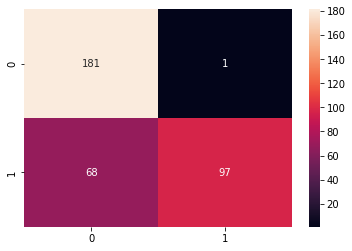

In [ ]:
p = pd.DataFrame(pred_svm)
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

SVM HPT

In [ ]:
#from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={'C':[0.1,1,10,100],
            'gamma':[1,0.1,0.01,0.001,0.0001],
            'kernel':['rbf']}

grid=GridSearchCV(SVC(),param_grid,verbose=5)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.8967509025270759
SVC(C=10, gamma=0.1)


After SVM HPT

In [ ]:
clf = SVC(kernel='rbf',C=10, gamma=0.1) 
  
# fitting x samples and y classes 
clf.fit(X_train, y_train) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, gamma=0.1)

In [ ]:
pred_svm_hpt = clf.predict(X_test)

In [ ]:
accuracy_score(y_test, pred)

0.899135446685879

In [ ]:
print("Classification report - \n", classification_report(y_test,pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.92      0.89      0.90       182
           1       0.88      0.91      0.90       165

    accuracy                           0.90       347
   macro avg       0.90      0.90      0.90       347
weighted avg       0.90      0.90      0.90       347



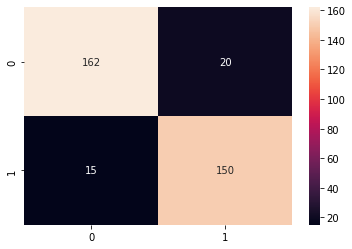

In [ ]:
p = pd.DataFrame(pred)
actual
cf_matrix = sm.confusion_matrix(actual,p)
sns.heatmap(cf_matrix, annot = True, fmt='g')

In [ ]:
svm_hpt_acc = sm.accuracy_score(y_test, pred_svm_hpt)*100
svm_hpt_prec = sm.precision_score(y_test, pred_svm_hpt)*100
svm_hpt_recall = sm.recall_score(y_test, pred_svm_hpt)*100

Plotting Accuracy, Precision and Recall of all the models used

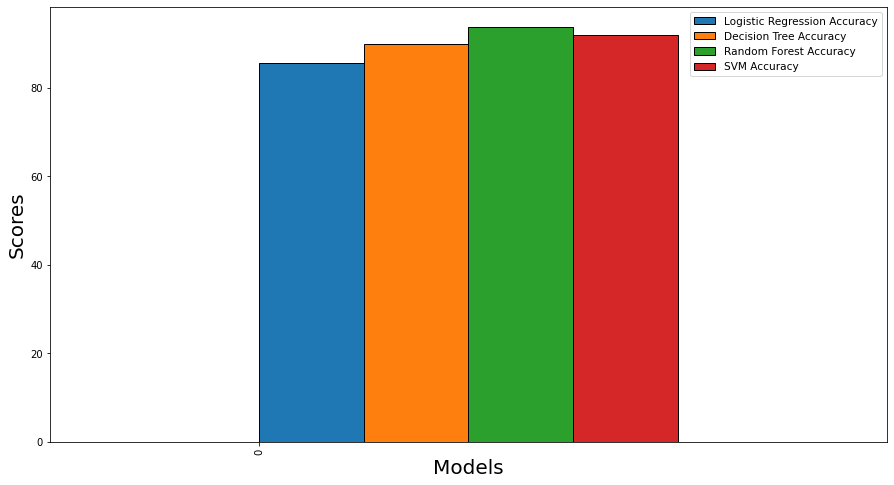

In [ ]:
modelacc = pd.DataFrame({"Logistic Regression Accuracy": [logreg_acc], 
                          "Decision Tree Accuracy": [dtree_acc],
                          "Random Forest Accuracy": [rf_acc],
                          "SVM Accuracy": [svm_hpt_acc]})
modelacc.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

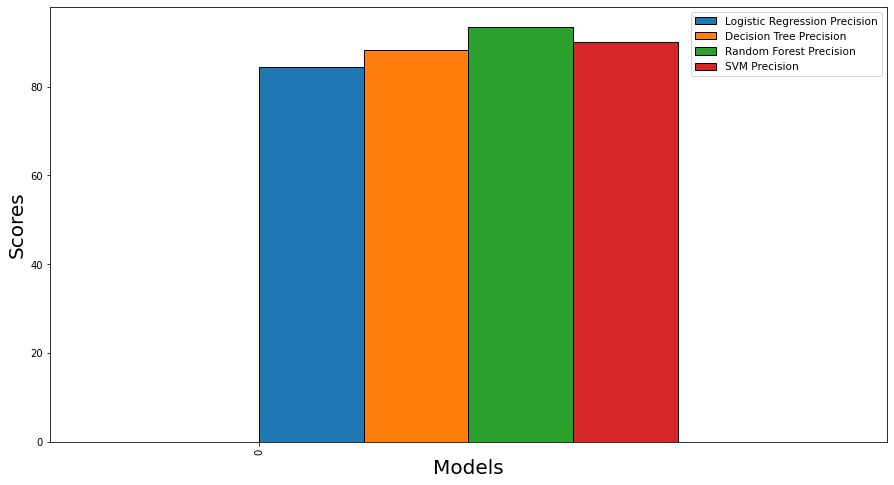

In [ ]:
modelprec = pd.DataFrame({"Logistic Regression Precision": [logreg_prec],
                          "Decision Tree Precision ": [dtree_prec],
                          "Random Forest Precision": [rf_prec],
                          "SVM Precision": [svm_hpt_prec]})
modelprec.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

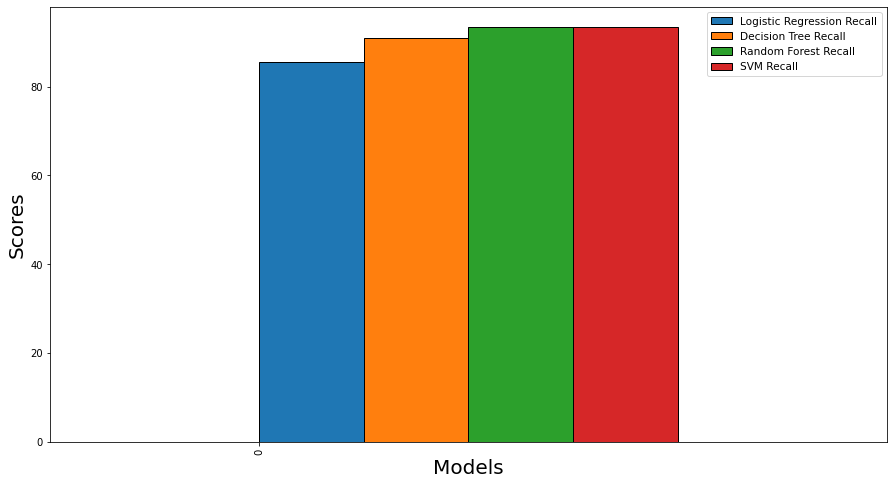

In [ ]:
modelrecall = pd.DataFrame({"Logistic Regression Recall": [logreg_recall],
                          "Decision Tree Recall ": [dtree_recall],
                               "Random Forest Recall": [rf_recall],
                          "SVM Recall": [svm_hpt_recall]})
modelrecall.plot.bar(align='edge',figsize=(15,8),ec="black");
plt.xlabel('Models', fontsize=20)
plt.ylabel('Scores',fontsize=20)
plt.legend(fontsize=10.5);

#Exploratory Data Analysis

In [ ]:
jobdf['required_education'].replace(['Not specified', 'Unspecified'], 'Empty', inplace=True)
jobdf['required_experience'].replace(['Not Applicable'], 'Empty', inplace=True)

Most desired required education in job adverts.

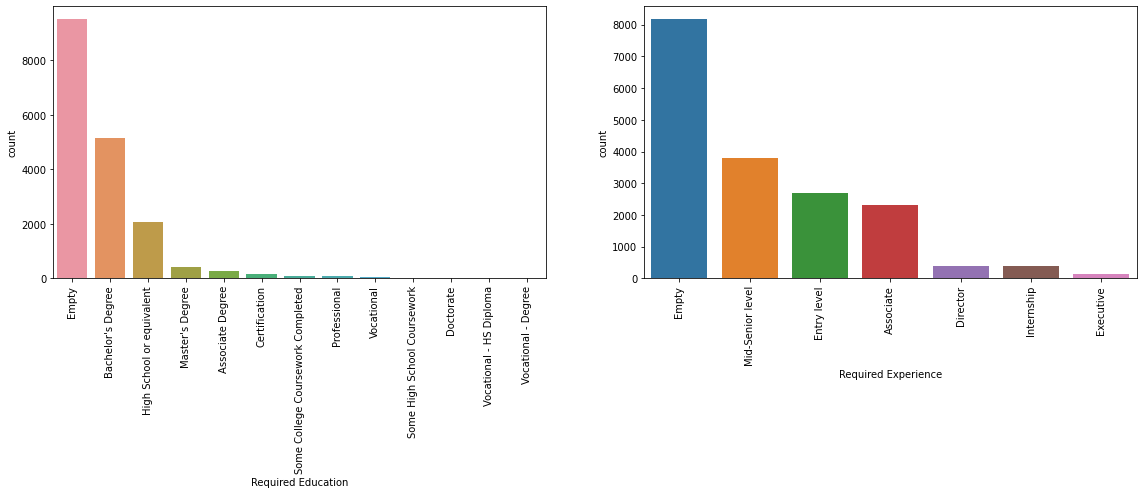

In [ ]:
plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=jobdf['required_education'].astype(str), data=jobdf['required_education'], order = jobdf['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education')


fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=jobdf['required_experience'].astype(str),  data=jobdf['required_experience'], order = jobdf['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience')

plt.show()

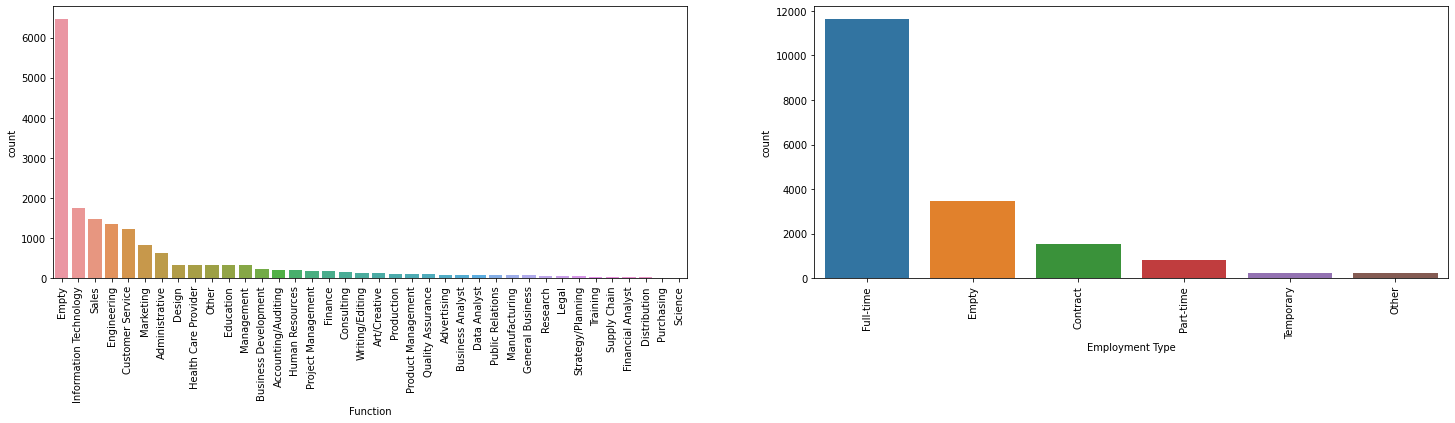

In [ ]:
plt.figure(figsize=(25,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=jobdf['function'].astype(str), data=jobdf['function'], order = jobdf['function'].value_counts().index)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function')

fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=jobdf['employment_type'].astype(str), data=jobdf['employment_type'], order = jobdf['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type')

plt.show()

Plotting above graphs for NonFraud V Fraud.

In [ ]:
fraudjob = pd.DataFrame(jobdf[jobdf['fraudulent']==1])
genuinejob = pd.DataFrame(jobdf[jobdf['fraudulent']==0])

In [ ]:
genuinejob.shape

(17014, 29)

Text(0.5, 0, 'Required Education for Fraud Jobs')

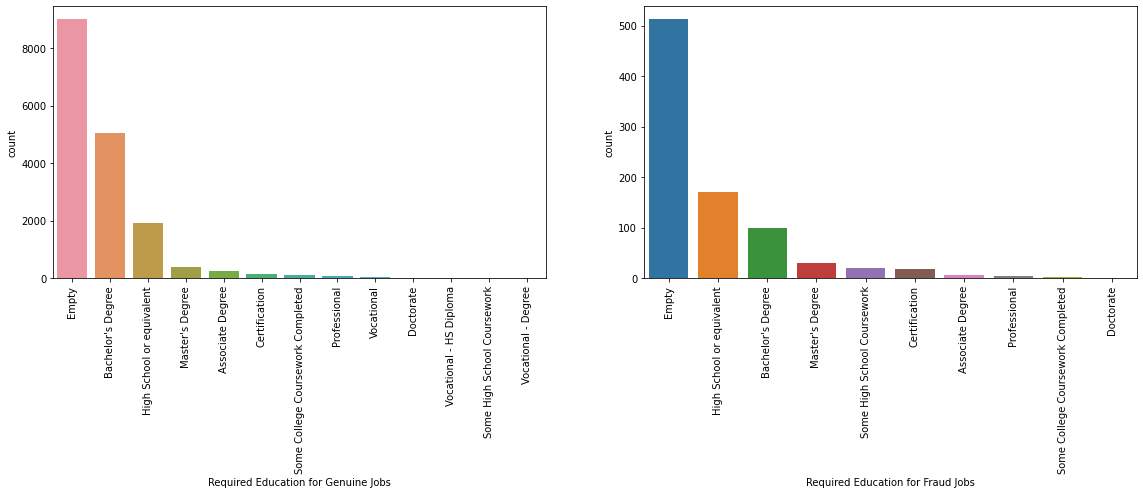

In [ ]:
plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=genuinejob['required_education'].astype(str), data=genuinejob['required_education'], order = genuinejob['required_education'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation=90)
plt.xlabel('Required Education for Genuine Jobs')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=fraudjob['required_education'].astype(str), data=fraudjob, order = fraudjob['required_education'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Required Education for Fraud Jobs')

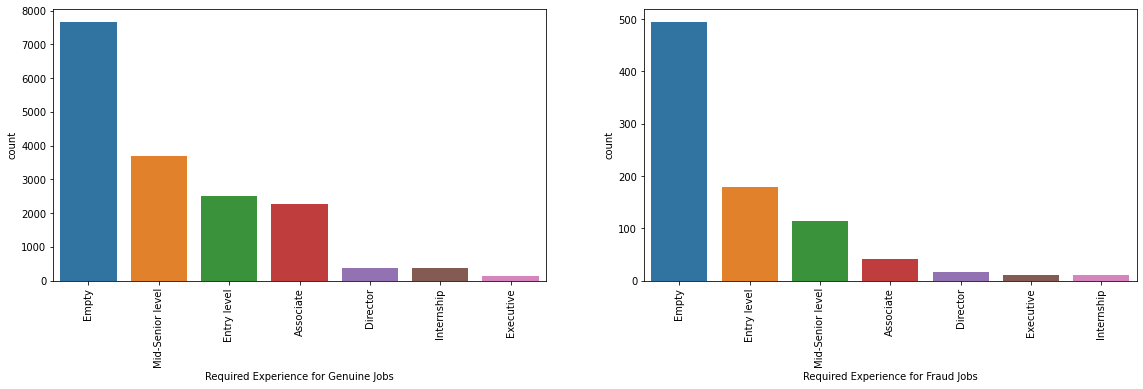

In [ ]:

plt.figure(figsize=(30,5))
fig1 = plt.subplot(1,3,1)
ax1 = sns.countplot(x=genuinejob['required_experience'].astype(str),  data=genuinejob['required_experience'], order = genuinejob['required_experience'].value_counts().index)
plt.setp(ax1.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience for Genuine Jobs')

fig2 = plt.subplot(1,3,2)
ax2 = sns.countplot(x=fraudjob['required_experience'].astype(str),  data=fraudjob['required_experience'], order = fraudjob['required_experience'].value_counts().index)
plt.setp(ax2.get_xticklabels(), rotation = 90)
plt.xlabel('Required Experience for Fraud Jobs')

plt.show()


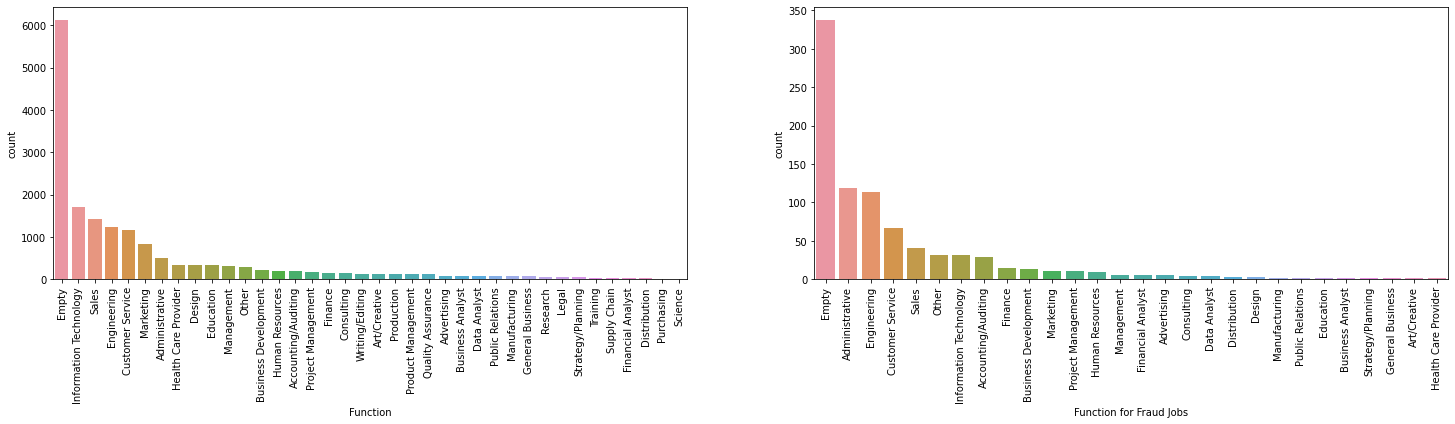

In [ ]:
plt.figure(figsize=(25,5))
fig1 = plt.subplot(1,2,1)
ax=sns.countplot(x=genuinejob['function'].astype(str), data=genuinejob['function'], order = genuinejob['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax.get_xticklabels(), rotation=90)
plt.xlabel('Function for Genuine Jobs')

fig1 = plt.subplot(1,2,2)
ax2=sns.countplot(x=fraudjob['function'].astype(str), data=fraudjob['function'], order = fraudjob['function'].value_counts().index)
#plt.xticks(rotation='vertical')
plt.setp(ax2.get_xticklabels(), rotation=90)
plt.xlabel('Function for Fraud Jobs')




plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


Text(0.5, 0, 'Employment Type for Fraud Jobs')

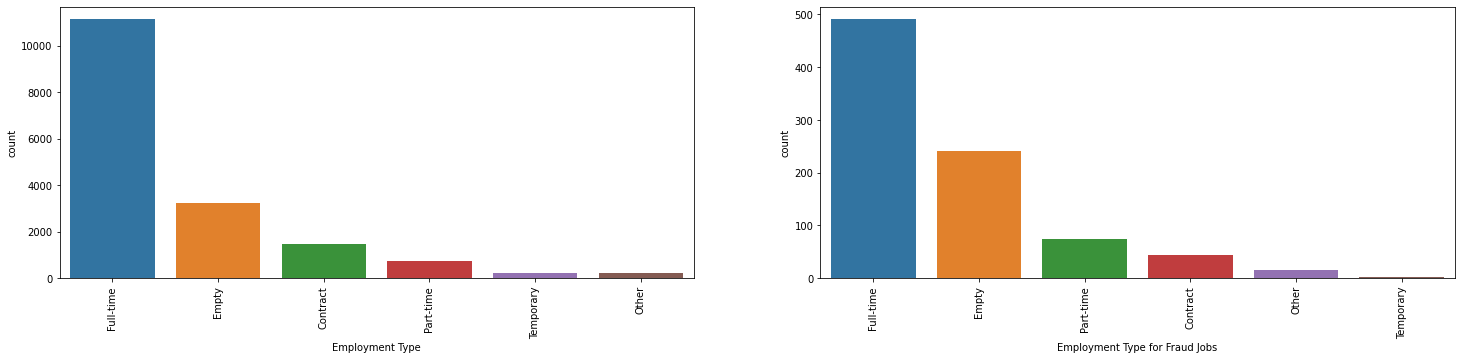

In [ ]:
plt.figure(figsize=(25,5))

fig = plt.subplot(1,2,1)
ax = sns.countplot(x=genuinejob['employment_type'].astype(str), data=genuinejob[jobdf['fraudulent']==1], order = genuinejob['employment_type'].value_counts().index)
plt.setp(ax.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type')


fig3 = plt.subplot(1,2,2)
ax3 = sns.countplot(x=fraudjob['employment_type'].astype(str), data=fraudjob, order = fraudjob['employment_type'].value_counts().index)
plt.setp(ax3.get_xticklabels(), rotation = 90)
plt.xlabel('Employment Type for Fraud Jobs')

#Job Description word count plotted for fraud jobs and non-fraud jobs

In [ ]:
from numpy.ma.core import size
plt.figure(figsize = (50,15))
sns.lineplot(x=jobdf.index, y=jobdf['desc_len'], hue=jobdf['fraudulent'], data = jobdf)
plt.xticks(size=25)
plt.yticks(size=25)